# Task 1 (5% credit) 
Provide a definition for the concept of a conjugate prior given the Bayesian learning model. What is the conjugate prior for the univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a fixed $\sigma$?

A conjugate prior is a prior that has is from the same family of distributions as the postierier.

Given $$y\sim {\cal N}(w x,\sigma^2)$$ the conjugate prior is $$w\sim {\cal N}(w^*,\sigma^*)$$

# Task 2 (5% credit). 
Which prior in the Bayesian linear regression framework leads to: a) Ridge regression, b) Lasso regression?

a) $w_j\sim{\cal N}(0,\sigma/\sqrt{\lambda})$

b) $p(w_j)\sim e^{-\lambda|w_j|/\sigma}$

# Task 3 (10% credit). 
Answer some questions about the properties of Lasso/Ridge:

a) Which of the Lasso and Ridge regressions possess an analytic solution in the closed form?

b) Which of the Lasso and Ridge regressions often use to completely eliminate coefficients for some of the regressors?

c) Which value of $\lambda$ makes Lasso and Ridge identical to the ordinary least square regression?

d) What dataset (training, validation or test) you would use to estimate the $\lambda$ for Lasso or Ridge?

a) Ridge

b) Lasso

c) They are identical to OLS at $\lambda=0$ or $\alpha=+\infty$

d) Validation

# Task 4 (15% credit). 
Consider a Bayesian univariate linear regression $y\sim {\cal N}(wx,\sigma^2)$ with a given $\sigma=1$ and the prior $w\sim {\cal N}(5,1)$. Compute the posterior distribution after an observation $y=12,x=2$. After all, what is the probability of having $w<5$?

Plugging the values into:
$$
e^{\frac{\left(w-\frac{ \sigma^{-2} y_i x_i +(\sigma^*)^{-2} w^*}{ \left(x_i^2\sigma^{-2}+(\sigma^*)^{-2}\right)}\right)^2}{\frac{2 }{(\sigma^*)^{-2}+x_i^2\sigma^{-2}}}}
$$
I get a posterior of ${\cal N}(5.8,1/\sqrt{5})$

Using the Normal CDF, I find that the probability of $w<5=0.0368$

# Task 5 (20% credit). 
For the training and test sets provided below, train a linear regression of $y$ (last column) vs the rest of the columns of the table treated as regressors (intercept excluded) over the training set, apply it to the test set and report it's R2 performance over both - training and test set.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
data_train=pd.read_csv("Homework1_training.csv")
data_test=pd.read_csv("Homework1_test.csv")

In [35]:
train_x = data_train.iloc[:,1:41]
train_y = data_train.iloc[:,41]
test_x = data_test.iloc[:,1:41]
test_y = data_test.iloc[:,41]

In [40]:
from pandas.stats.api import ols
from sklearn import linear_model

In [36]:
result = ols(x=train_x, y=train_y)

In [37]:
predicted_y  = result.predict(x=test_x)

In [38]:
error=test_y-predicted_y
R2 = 1-error.var()/test_y.var()

In [39]:
print "In sample R2 = %s" % result.r2
print "Out of sample R2 = %s" % R2

In sample R2 = 0.999999858894
Out of sample R2 = -2.40063318779


# Task 6 (20% credit). 
Train Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ and report their performance over the test set.

In [44]:
# Ridge
ridge = linear_model.Ridge(fit_intercept=True,alpha=40000)

# Lasso
lasso = linear_model.Lasso(fit_intercept=True,alpha=40)

for name, model in [('Ridge', ridge), ('Lasso', lasso)]:
    print "\n%s:" % name
    
    model.fit(train_x, train_y)

    for label, x, y in [('In Sample', train_x, train_y), ('Out of Sample', test_x, test_y)]:

        pred = model.predict(x)

        err = pred - y
        R2 = 1 - np.var(err)/np.var(y)
        print "The R-squared we found for %s is: %s" % (label, R2)


Ridge:
The R-squared we found for In Sample is: 0.853278042856
The R-squared we found for Out of Sample is: 0.656284514237

Lasso:
The R-squared we found for In Sample is: 0.869183660919
The R-squared we found for Out of Sample is: 0.651017455205


# Task 7 (25% credit). 
For each $m=1,2,...39$ train OLS, Lasso and Ridge regressions using the training sample above with $\lambda_{Ridge}=40000$ and $\lambda_{Lasso}=40$ using the first $m$ columns of the data tables as the regressors and plot the in-sample (training) and out-of-sample (test) R2 for all three models on the same graph.

In [45]:
import pylab as pl
# Make plots prettyful
pl.style.use('fivethirtyeight')

In [55]:
R2 = {
    'OLS': {
        'IS': [],
        'OS': []
    },
    'Ridge': {
        'IS': [],
        'OS': []
    },
    'Lasso': {
        'IS': [],
        'OS': []
    }
}

for i in range(2,42):
    train_x = data_train.iloc[:,1:i]
    test_x = data_test.iloc[:,1:i]
    
    #OLS
    result = ols(x=train_x, y=train_y)
    predicted_y  = result.predict(x=test_x)
    error=test_y-predicted_y
    r2 = 1-error.var()/test_y.var()
    
    R2['OLS']['IS'].append(result.r2)
    R2['OLS']['OS'].append(r2)
    
    
    ridge = linear_model.Ridge(fit_intercept=True,alpha=40000)
    lasso = linear_model.Lasso(fit_intercept=True,alpha=40)

    for name, model in [('Ridge', ridge), ('Lasso', lasso)]:
        model.fit(train_x, train_y)

        for label, x, y in [('IS', train_x, train_y), ('OS', test_x, test_y)]:
            pred = model.predict(x)

            err = pred - y
            r2 = 1 - np.var(err)/np.var(y)
            R2[name][label].append(r2)

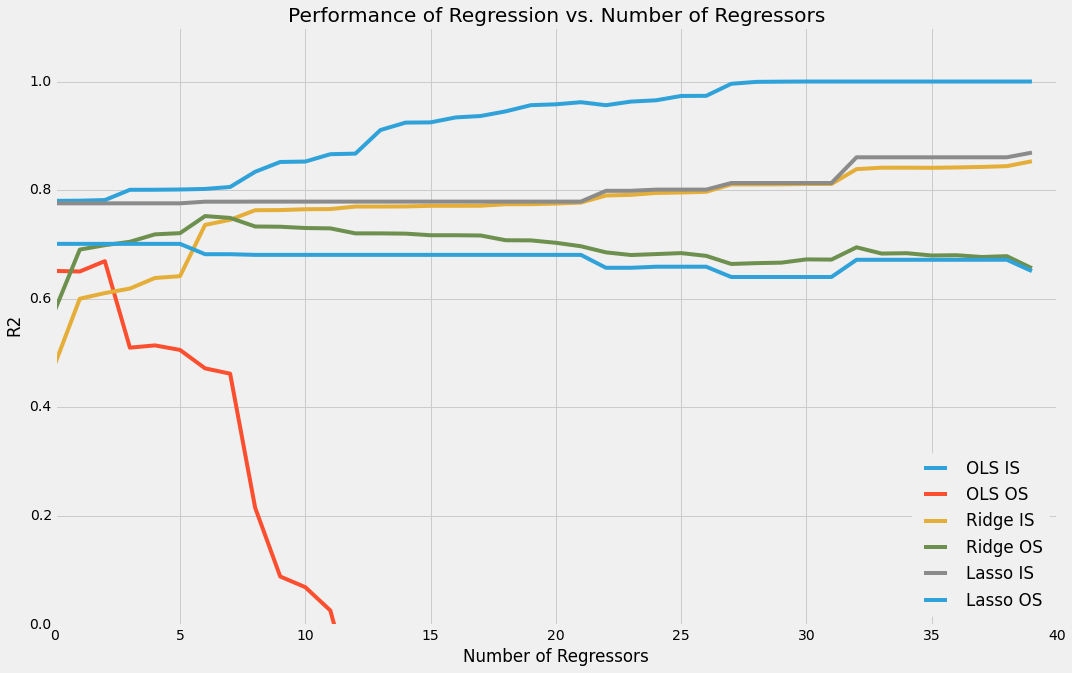

In [68]:
figure, ax = pl.subplots(figsize=(16,10))

for k,v in R2.iteritems():
    for k2, v2 in v.iteritems():
        ax.plot(v2, label='%s %s' % (k, k2))
ax.set_ylim([0,1.1])
ax.legend(loc='lower right')
ax.set_xlabel('Number of Regressors')
ax.set_ylabel('R2')
ax.set_title('Performance of Regression vs. Number of Regressors')

_I cut off the OLS OS line since it makes it harder to see details in the rest.  Suffice to say, it just keeps dropping._

# Extracredit (25% of credit to be applied towards this or any other homework)
Using a series of 10 random splits (cross-validation) of the training sample into approximately 60% training and 40% validation samples perform the selection of the optimal $\lambda$ for Ridge and Lasso regression: for each $\lambda$ of the considered sequence compute an average validation R2 for the 10 splits considered and finally select the $\lambda$ having the highest value for this average R2. Visualize the dependence of the said average cross-validation R2 over $\lambda$ for Lasso and Ridge. Report the R2 computed over the test set for the Lasso and Ridge trained over the entire training set with the selected optimal values of $\lambda$.